## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman2Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1
bias = 1 

In [4]:
# Parameters
variance = 1
bias = 1


## Dataset 


In [5]:
#Parameters 
n_features = 4
n_samples= 100
n_target = 1 

In [6]:
X,Y = friedman2Dataset.friedman2_data(n_samples)

          X1           X2        X3         X4           Y
0  36.101997   789.407719  0.469117   3.238818  372.021144
1  35.485411   983.139076  0.503473   6.476641  496.476816
2  82.317781  1270.051160  0.734257  10.812447  936.225926
3  55.668409   784.149023  0.466334   4.713430  369.913513
4   9.213628   227.812936  0.665200   3.644474  151.854787


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.024897
0:	learn: 0.9226982	total: 57.9ms	remaining: 57.9s
1:	learn: 0.9133590	total: 58.4ms	remaining: 29.1s
2:	learn: 0.9033723	total: 58.9ms	remaining: 19.6s
3:	learn: 0.8937721	total: 59.5ms	remaining: 14.8s
4:	learn: 0.8822272	total: 60ms	remaining: 11.9s
5:	learn: 0.8723123	total: 60.6ms	remaining: 10s
6:	learn: 0.8601659	total: 61.2ms	remaining: 8.68s
7:	learn: 0.8488864	total: 61.9ms	remaining: 7.67s
8:	learn: 0.8372063	total: 62.4ms	remaining: 6.87s
9:	learn: 0.8248206	total: 62.9ms	remaining: 6.23s
10:	learn: 0.8144554	total: 63.5ms	remaining: 5.71s
11:	learn: 0.8024247	total: 64ms	remaining: 5.27s
12:	learn: 0.7921394	total: 64.4ms	remaining: 4.89s
13:	learn: 0.7821329	total: 65ms	remaining: 4.57s
14:	learn: 0.7712729	total: 65.4ms	remaining: 4.29s
15:	learn: 0.7633997	total: 65.9ms	remaining: 4.05s
16:	learn: 0.7537346	total: 66.5ms	remaining: 3.84s
17:	learn: 0.7443709	total: 66.8ms	remaining: 3.65s
18:	learn: 0.7371628	total: 67.2ms	remaining: 3.47s


106:	learn: 0.2646395	total: 106ms	remaining: 881ms
107:	learn: 0.2619172	total: 106ms	remaining: 877ms
108:	learn: 0.2593968	total: 106ms	remaining: 870ms
109:	learn: 0.2571496	total: 107ms	remaining: 865ms
110:	learn: 0.2541901	total: 107ms	remaining: 861ms
111:	learn: 0.2516293	total: 108ms	remaining: 855ms
112:	learn: 0.2492114	total: 108ms	remaining: 851ms
113:	learn: 0.2461643	total: 109ms	remaining: 846ms
114:	learn: 0.2437610	total: 110ms	remaining: 846ms
115:	learn: 0.2417960	total: 110ms	remaining: 841ms
116:	learn: 0.2392675	total: 111ms	remaining: 835ms
117:	learn: 0.2368537	total: 111ms	remaining: 830ms
118:	learn: 0.2347136	total: 111ms	remaining: 824ms
119:	learn: 0.2325613	total: 112ms	remaining: 819ms
120:	learn: 0.2296629	total: 112ms	remaining: 815ms
121:	learn: 0.2278442	total: 112ms	remaining: 809ms
122:	learn: 0.2250443	total: 113ms	remaining: 805ms
123:	learn: 0.2229412	total: 113ms	remaining: 800ms
124:	learn: 0.2201993	total: 114ms	remaining: 796ms
125:	learn: 

290:	learn: 0.0541133	total: 186ms	remaining: 453ms
291:	learn: 0.0537739	total: 186ms	remaining: 452ms
292:	learn: 0.0534185	total: 187ms	remaining: 451ms
293:	learn: 0.0530696	total: 187ms	remaining: 450ms
294:	learn: 0.0526861	total: 188ms	remaining: 449ms
295:	learn: 0.0523296	total: 188ms	remaining: 448ms
296:	learn: 0.0520072	total: 189ms	remaining: 446ms
297:	learn: 0.0516342	total: 189ms	remaining: 445ms
298:	learn: 0.0512628	total: 189ms	remaining: 444ms
299:	learn: 0.0508926	total: 190ms	remaining: 443ms
300:	learn: 0.0505732	total: 190ms	remaining: 442ms
301:	learn: 0.0502761	total: 191ms	remaining: 441ms
302:	learn: 0.0499617	total: 191ms	remaining: 440ms
303:	learn: 0.0496222	total: 192ms	remaining: 439ms
304:	learn: 0.0493090	total: 192ms	remaining: 438ms
305:	learn: 0.0489984	total: 193ms	remaining: 437ms
306:	learn: 0.0486450	total: 193ms	remaining: 436ms
307:	learn: 0.0484331	total: 194ms	remaining: 435ms
308:	learn: 0.0481082	total: 194ms	remaining: 434ms
309:	learn: 

524:	learn: 0.0153202	total: 288ms	remaining: 260ms
525:	learn: 0.0152305	total: 288ms	remaining: 259ms
526:	learn: 0.0151893	total: 288ms	remaining: 259ms
527:	learn: 0.0151188	total: 289ms	remaining: 258ms
528:	learn: 0.0150386	total: 289ms	remaining: 257ms
529:	learn: 0.0149648	total: 289ms	remaining: 257ms
530:	learn: 0.0149247	total: 290ms	remaining: 256ms
531:	learn: 0.0148851	total: 290ms	remaining: 256ms
532:	learn: 0.0148168	total: 291ms	remaining: 255ms
533:	learn: 0.0147449	total: 291ms	remaining: 254ms
534:	learn: 0.0146881	total: 292ms	remaining: 254ms
535:	learn: 0.0146131	total: 292ms	remaining: 253ms
536:	learn: 0.0145746	total: 293ms	remaining: 252ms
537:	learn: 0.0144739	total: 293ms	remaining: 252ms
538:	learn: 0.0144325	total: 294ms	remaining: 251ms
539:	learn: 0.0143748	total: 294ms	remaining: 250ms
540:	learn: 0.0143060	total: 294ms	remaining: 250ms
541:	learn: 0.0142409	total: 295ms	remaining: 249ms
542:	learn: 0.0141690	total: 295ms	remaining: 248ms
543:	learn: 

710:	learn: 0.0068150	total: 368ms	remaining: 149ms
711:	learn: 0.0067767	total: 368ms	remaining: 149ms
712:	learn: 0.0067466	total: 369ms	remaining: 148ms
713:	learn: 0.0067425	total: 369ms	remaining: 148ms
714:	learn: 0.0067383	total: 369ms	remaining: 147ms
715:	learn: 0.0067090	total: 370ms	remaining: 147ms
716:	learn: 0.0067049	total: 370ms	remaining: 146ms
717:	learn: 0.0067009	total: 370ms	remaining: 146ms
718:	learn: 0.0066969	total: 371ms	remaining: 145ms
719:	learn: 0.0066929	total: 371ms	remaining: 144ms
720:	learn: 0.0066642	total: 372ms	remaining: 144ms
721:	learn: 0.0066603	total: 372ms	remaining: 143ms
722:	learn: 0.0066564	total: 372ms	remaining: 143ms
723:	learn: 0.0066526	total: 373ms	remaining: 142ms
724:	learn: 0.0066488	total: 373ms	remaining: 142ms
725:	learn: 0.0066208	total: 374ms	remaining: 141ms
726:	learn: 0.0066170	total: 374ms	remaining: 140ms
727:	learn: 0.0066133	total: 374ms	remaining: 140ms
728:	learn: 0.0066096	total: 375ms	remaining: 139ms
729:	learn: 

947:	learn: 0.0034428	total: 470ms	remaining: 25.8ms
948:	learn: 0.0034267	total: 471ms	remaining: 25.3ms
949:	learn: 0.0034141	total: 471ms	remaining: 24.8ms
950:	learn: 0.0034071	total: 471ms	remaining: 24.3ms
951:	learn: 0.0033945	total: 472ms	remaining: 23.8ms
952:	learn: 0.0033833	total: 472ms	remaining: 23.3ms
953:	learn: 0.0033705	total: 473ms	remaining: 22.8ms
954:	learn: 0.0033609	total: 473ms	remaining: 22.3ms
955:	learn: 0.0033473	total: 474ms	remaining: 21.8ms
956:	learn: 0.0033351	total: 474ms	remaining: 21.3ms
957:	learn: 0.0033280	total: 474ms	remaining: 20.8ms
958:	learn: 0.0033163	total: 475ms	remaining: 20.3ms
959:	learn: 0.0033093	total: 475ms	remaining: 19.8ms
960:	learn: 0.0032966	total: 476ms	remaining: 19.3ms
961:	learn: 0.0032898	total: 476ms	remaining: 18.8ms
962:	learn: 0.0032824	total: 476ms	remaining: 18.3ms
963:	learn: 0.0032709	total: 477ms	remaining: 17.8ms
964:	learn: 0.0032586	total: 477ms	remaining: 17.3ms
965:	learn: 0.0032519	total: 478ms	remaining: 

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape) + bias 
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)
mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mae)

# ABC GAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

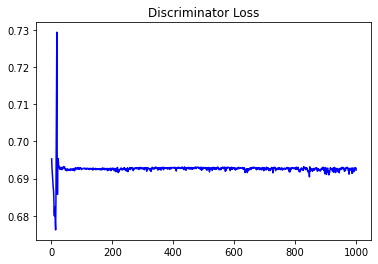

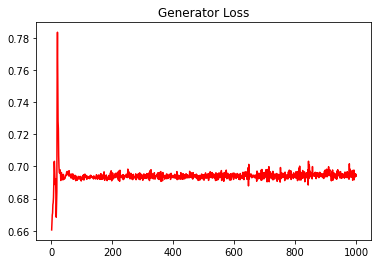

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.011116999838543197


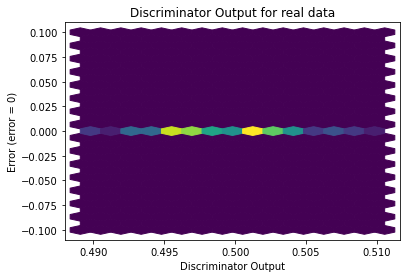

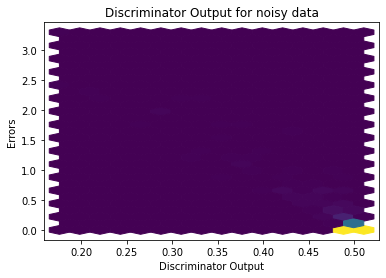

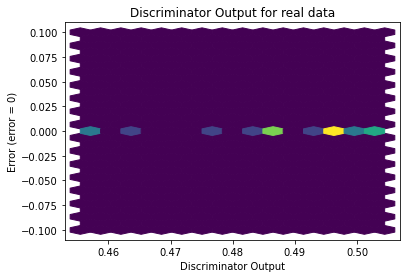

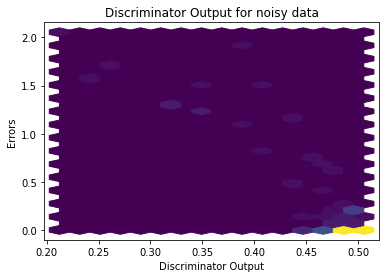

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


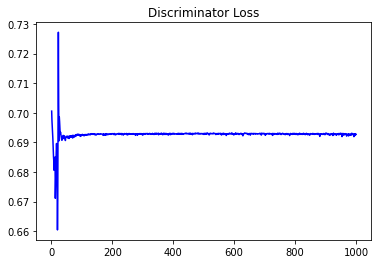

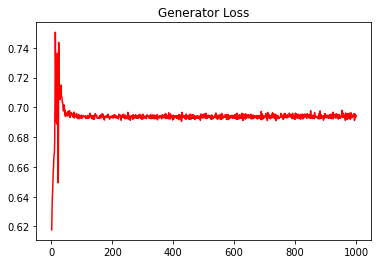

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.009815204439649665


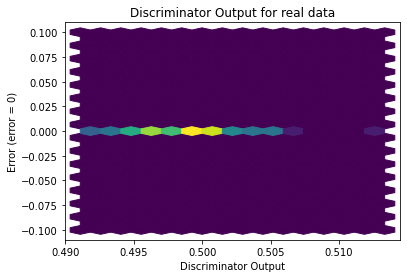

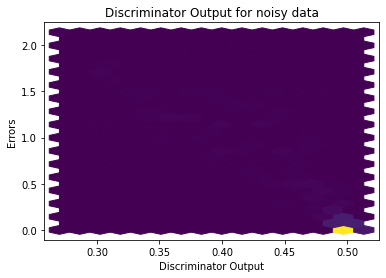

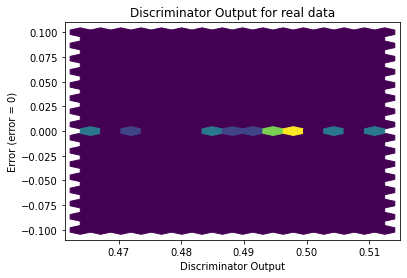

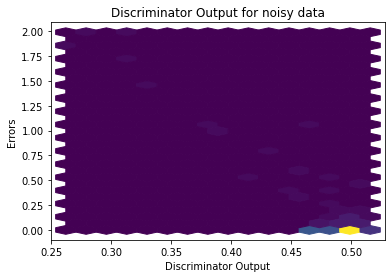

In [18]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.9073]], requires_grad=True)
